<a href="https://colab.research.google.com/github/azamjon98/final_project/blob/main/assignment_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вопросы к assignment 1
Для работы вам предоставлен датасет, содержащий характеристики авто (19 признаков) и таргет для предсказания - его цену. Цена по своей сути - это непрерывная величина (не категориальная), поэтому перед вами задача регрессии.

Вы можете создавать более одной ячейком под соответствующими вопросами. Вопросы повышенной сложности отмечены *

Признаки:
- Make - приозводитель
- Model - модель авто
- Price - цена авто, таргет для моделей
- Year - год выпуска авто
- Kilometer - пробег авто в километрах
- Fuel Type - тип топлива для авто
- Transmission - тип коробка передач
- Location - место продажи
- Color - цвет авто
- Owner - количество предыдущих владельцев
- Seller Type - кто выступает продавцом
- Engine - тип двигателя
- Max Power - максимальная мощность авто
- Max Torque - максимальный крутящий момент авто
- Drivetrain - тип трансмиссии авто
- Length - длина авто
- Width - ширина авто
- Height - высота авто
- Seating Capacity - количество сидячих мест
- Fuel Tank Capacity - объем топливного бака

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
encoder1=OrdinalEncoder()
encoder2=OneHotEncoder()

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [210]:
df = pd.read_csv('/content/car details v4.csv')
data=df.copy()

In [5]:
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


1. Вывести общую информацию по данным, сколько числовых и сколько сктроковых типов признаков? Перечислить признаки, имеющие пропуски в данных. Какие методы работы с пропущенными значениями вы знаете? Обработайте эти пропуски. Важно, линейная регрессия не умеет работать с пропусками в данных.

In [211]:
# your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

## Missing values in percentage

In [7]:
nulls=data.isnull().sum()/len(data)*100
nulls[nulls>0]

Engine                3.885381
Max Power             3.885381
Max Torque            3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Seating Capacity      3.108305
Fuel Tank Capacity    5.488101
dtype: float64

In [8]:
data['Engine'].unique()

array(['1198 cc', '1248 cc', '1197 cc', '2393 cc', '1373 cc', '1991 cc',
       '1995 cc', '1798 cc', '1461 cc', '999 cc', '1462 cc', '1956 cc',
       '998 cc', '796 cc', '1591 cc', '1086 cc', '1199 cc', '1582 cc',
       nan, '1047 cc', '2143 cc', '1968 cc', '1796 cc', '2498 cc',
       '2494 cc', '2179 cc', '1998 cc', '1497 cc', '1196 cc', '2755 cc',
       '1799 cc', '1493 cc', '1399 cc', '1498 cc', '1997 cc', '1598 cc',
       '2993 cc', '2995 cc', '2982 cc', '1353 cc', '1984 cc', '2967 cc',
       '2609 cc', '1950 cc', '1999 cc', '4663 cc', '1451 cc', '2354 cc',
       '1396 cc', '2987 cc', '2997 cc', '1336 cc', '4163 cc', '3496 cc',
       '799 cc', '2979 cc', '4806 cc', '2996 cc', '1061 cc', '2184 cc',
       '2497 cc', '2999 cc', '1948 cc', '3436 cc', '2925 cc', '2489 cc',
       '1368 cc', '1797 cc', '1298 cc', '2694 cc', '1186 cc', '1364 cc',
       '3498 cc', '3982 cc', '1120 cc', '2523 cc', '1988 cc', '3902 cc',
       '624 cc', '2477 cc', '3198 cc', '5204 cc', '814 cc', '

### We should drop cc from Engine column and then we will convert into numerical data

In [212]:
data['Engine']=data['Engine'].str.split(' ',expand=True)[0]
data['Engine']=data['Engine'].astype(float)
data['Engine'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2059 entries, 0 to 2058
Series name: Engine
Non-Null Count  Dtype  
--------------  -----  
1979 non-null   float64
dtypes: float64(1)
memory usage: 16.2 KB


In [213]:
## we will fill with median value
data['Engine'].fillna(data['Engine'].median(),inplace=True)

In [214]:
data[['Max_Power_hp','Max_Power_rpm']]=data['Max Power'].str.split('@',expand=True)

In [215]:
data['Max_Power_hp']=data['Max_Power_hp'].str.strip(' bhp')
data['Max_Power_hp']=data['Max_Power_hp'].astype(float)
data['Max_Power_hp']=data['Max_Power_hp'].fillna(data['Max_Power_hp'].median())

In [216]:
data['Max_Power_rpm']=data['Max_Power_rpm'].str.strip(' ')
data['Max_Power_rpm']=data['Max_Power_rpm'].str.replace(' rpm','')

In [217]:
data['Max_Power_rpm']=data['Max_Power_rpm'].replace('',np.nan)
data['Max_Power_rpm']=data['Max_Power_rpm'].astype(float)
data['Max_Power_rpm']=data['Max_Power_rpm'].fillna(data['Max_Power_rpm'].median())

In [218]:
data.drop('Max Power',axis=1,inplace=True)
data[['Max_Power_hp','Max_Power_rpm']].isna().sum()

Max_Power_hp     0
Max_Power_rpm    0
dtype: int64

In [219]:
data['Max_Torque_Nm']=data['Max Torque'].str.split('@',expand=True)[0]
data['Max_Torque_rpm']=data['Max Torque'].str.split('@',expand=True)[1]
data['Max_Torque_Nm']=data['Max_Torque_Nm'].str.replace('Nm','')
data['Max_Torque_rpm']=data['Max_Torque_rpm'].str.replace('rpm','')

In [220]:
data['Max_Torque_Nm']=data['Max_Torque_Nm'].astype(float)
data['Max_Torque_rpm']=data['Max_Torque_rpm'].astype(float)
data['Max_Torque_Nm']=data['Max_Torque_Nm'].fillna(data['Max_Torque_Nm'].median())
data['Max_Torque_rpm']=data['Max_Torque_rpm'].fillna(data['Max_Torque_rpm'].median())
data.drop('Max Torque',axis=1,inplace=True)
data[['Max_Torque_Nm','Max_Torque_rpm']].isna().sum()

Max_Torque_Nm     0
Max_Torque_rpm    0
dtype: int64

In [221]:
data['Drivetrain']=data['Drivetrain'].fillna(data['Drivetrain'].mode()[0])

In [222]:
data['Length']=data['Length'].fillna(data['Length'].median())
data['Width']=data['Width'].fillna(data['Width'].median())
data['Height']=data['Height'].fillna(data['Height'].median())
data['Fuel Tank Capacity']=data['Fuel Tank Capacity'].fillna(data['Fuel Tank Capacity'].median())
data['Seating Capacity']=data['Seating Capacity'].fillna(data['Seating Capacity'].median())
data.isna().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Max_Power_hp          0
Max_Power_rpm         0
Max_Torque_Nm         0
Max_Torque_rpm        0
dtype: int64

2. Вывести описательные статистики по численным признакам. Какая медиана у признака "Kilometer"? Какая медиана у признака "Fuel Tank Capacity"? Какой год выпуска является самым минимальным/максимальным? Выведите строку(-и) в данных, имеющую(-щих) эти года выпуска.

In [ ]:
# your code here
data.describe()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power_hp,Max_Torque_Nm,Max_Torque_rpm
count,2.059000e+03,2059.000000,2.059000e+03,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,1.702992e+06,2016.425449,5.422471e+04,1685.015542,4283.631374,1768.054395,1590.282661,5.296746,51.892326,129.082904,244.069532,2591.588150
std,2.419881e+06,3.363564,5.736172e+04,632.220086,435.799127,133.146412,134.186875,0.811029,14.696588,63.850696,137.993430,1190.786354
min,4.900000e+04,1988.000000,0.000000e+00,624.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000,35.000000,48.000000,150.000000
25%,4.849990e+05,2014.000000,2.900000e+04,1198.000000,3986.000000,1695.000000,1485.000000,5.000000,42.000000,83.000000,115.000000,1600.000000
50%,8.250000e+05,2017.000000,5.000000e+04,1498.000000,4370.000000,1770.000000,1545.000000,5.000000,50.000000,116.000000,200.000000,1900.000000
75%,1.925000e+06,2019.000000,7.200000e+04,1995.000000,4620.000000,1831.000000,1672.000000,5.000000,60.000000,169.000000,343.000000,4000.000000
max,3.500000e+07,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,660.000000,780.000000,6500.000000


In [20]:
### Какая медиана у признака "Kilometer"?
print(data['Kilometer'].median())

50000.0


In [ ]:
### Какая медиана у признака "Fuel Tank Capacity"?
print(data['Fuel Tank Capacity'].median())

50.0


In [ ]:
### Какой год выпуска является самым минимальным/максимальным?
print('Minimum:','Year',data['Year'].min())
print('Maximum:','Year',data['Year'].max())

Minimum: Year 1988
Maximum: Year 2022


3. Какой производитель ("Make") встречается наиболее часто в датасете? Выведите количество и долю в процентах.

In [ ]:
# your code here
data['Make'].value_counts()/len(data)*100

Make
Maruti Suzuki    21.369597
Hyundai          16.949976
Mercedes-Benz     8.305002
Honda             7.673628
Toyota            6.410879
Audi              6.168043
BMW               5.876639
Mahindra          5.779505
Tata              2.768334
Volkswagen        2.428363
Ford              2.331229
Renault           2.088392
Skoda             1.942691
Land Rover        1.602720
Kia               1.117047
Jeep              0.874211
Jaguar            0.825644
MG                0.825644
Nissan            0.777076
Volvo             0.777076
Porsche           0.728509
MINI              0.534240
Datsun            0.388538
Chevrolet         0.339971
Lexus             0.291404
Mitsubishi        0.194269
Ssangyong         0.145702
Rolls-Royce       0.145702
Isuzu             0.097135
Fiat              0.097135
Maserati          0.048567
Ferrari           0.048567
Lamborghini       0.048567
Name: count, dtype: float64

4. Какой город наиболее часто встречается в датасете?

In [ ]:
# your code here
data['Location'].value_counts()/len(data)*100

Location
Mumbai              16.610005
Delhi               14.910151
Pune                 6.993686
Bangalore            6.410879
Hyderabad            5.633803
                      ...    
Faizabad             0.048567
Pimpri-Chinchwad     0.048567
Rohtak               0.048567
Valsad               0.048567
Siliguri             0.048567
Name: count, Length: 77, dtype: float64

5. Постройте гистограмму для признака "Fuel Tank Capacity". Какими бы вы выбрали границы категорий для разбиения этого признака и что может помочь вам в этом? В каких целях можно использовать эти категории в дальнейшем? Повторите описанные действия для признака "Seating Capacity".

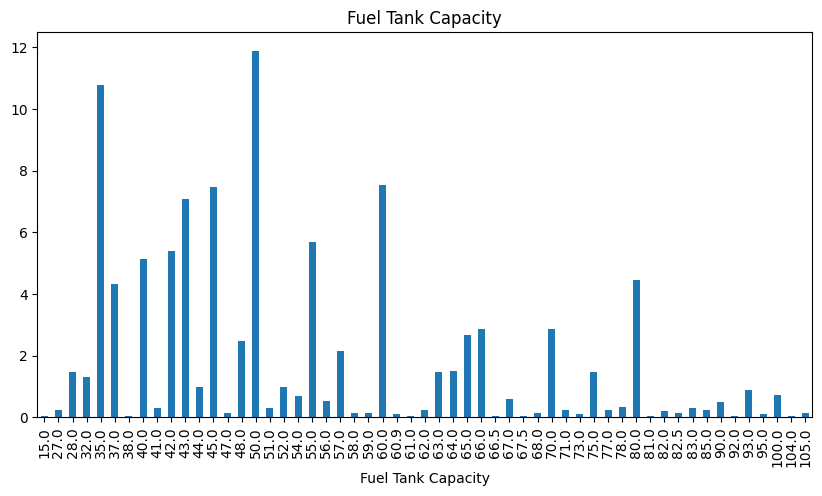

In [ ]:
plt.figure(figsize=(10,5))
fueltank=data['Fuel Tank Capacity'].value_counts()/len(data)*100
fueltank.sort_index().plot(kind='bar')
plt.xlabel('Fuel Tank Capacity')
plt.title('Fuel Tank Capacity')
plt.show()

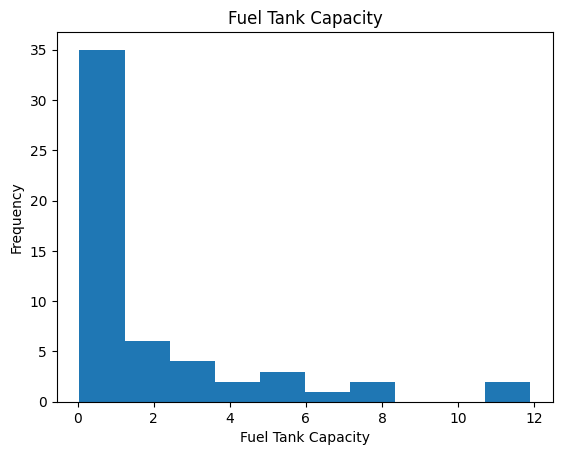

In [ ]:
fueltank.sort_index().plot(kind='hist')
plt.xlabel('Fuel Tank Capacity')
plt.title('Fuel Tank Capacity')
plt.show()

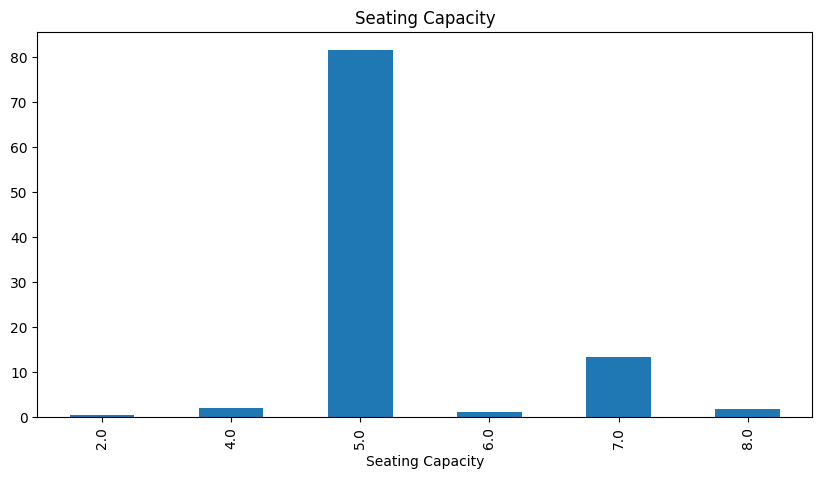

In [ ]:
plt.figure(figsize=(10,5))
seats=data['Seating Capacity'].value_counts()/len(data)*100
seats.sort_index().plot(kind='bar')
plt.title('Seating Capacity')
plt.show()

*6. Постройте pie chart для признаков "Color"/"Owner"/"Seller Type". Укажите данные как в числах, так и в процентах. Добавьте легенду на графики (подписи осей, категорий данных, поиграйтесь с цветом и другим функционалом seaborn).

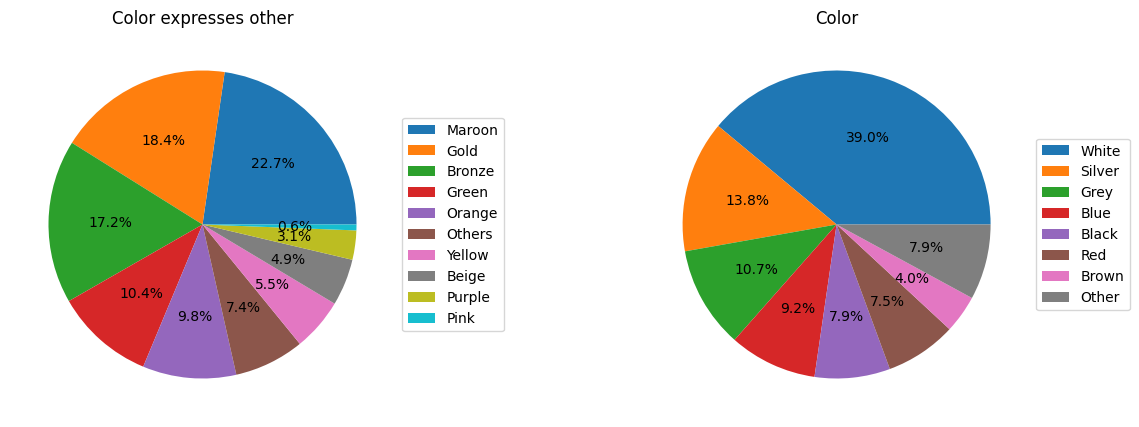

In [ ]:
# your code here
fig,axs=plt.subplots(1,2,figsize=(15,5))

color=data['Color'].value_counts()/len(data)*100
other=color[color<3]
color=color[color>=3]
color.loc['Other']=other.sum()
axs[1].pie(color,autopct='%1.1f%%')
axs[0].pie(other,autopct='%1.1f%%')
axs[0].legend(other.index,loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].legend(color.index,loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_title('Color expresses other')
plt.title('Color')
plt.show()

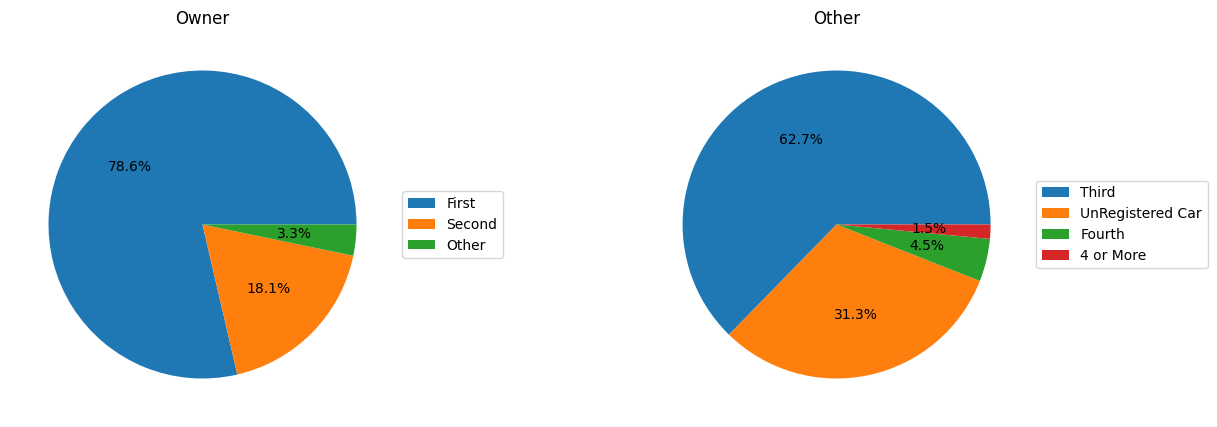

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(15,5))
owner=data['Owner'].value_counts()/len(data)*100
other=owner[owner<3]
owner=owner[owner>=3]
owner.loc['Other']=other.sum()
axs[0].pie(owner,autopct='%1.1f%%')
axs[1].pie(other,autopct='%1.1f%%')
axs[0].legend(owner.index,loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].legend(other.index,loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_title('Owner')
axs[1].set_title('Other')
plt.show()

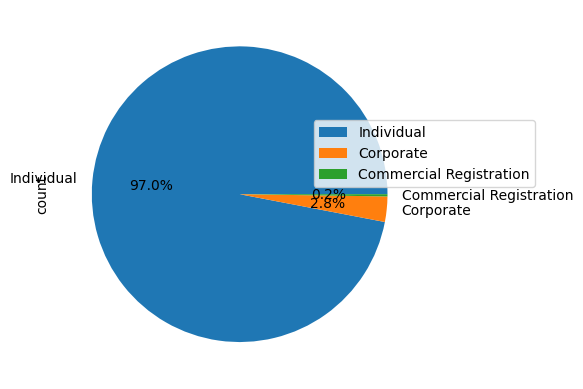

In [ ]:
seller=data['Seller Type'].value_counts()/len(data)*100
seller.plot(kind='pie',autopct='%1.1f%%')
plt.legend(seller.index,loc='lower center', bbox_to_anchor=(1, 0.5))
plt.show()

7. Добавьте к данным новые признаки (новые колонки) в группировке по прозводителю ("Make"): медиана "Kilometer"/"Length"/"Fuel tank Capacity". Т.е. для каждой записи в новой колонке должны содержаться соответствующие данной модели признаки, которые показывают "медиану пробега авто марки Toyota" и т.д. Подсказка: необходимо воспользоваться методом groupby().

In [223]:
# your code here
grouped=pd.DataFrame()
grouped[['Kilometer_per_make','Length_per_make','Fuel_Tank_Capacity_per_make']]=data[['Make','Kilometer','Length','Fuel Tank Capacity']].groupby('Make').median()
data=pd.merge(data,grouped,on='Make',how='left')
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Height,Seating Capacity,Fuel Tank Capacity,Max_Power_hp,Max_Power_rpm,Max_Torque_Nm,Max_Torque_rpm,Kilometer_per_make,Length_per_make,Fuel_Tank_Capacity_per_make
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0,53729.0,4420.0,40.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0,50549.5,3850.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000.0,48500.0,3995.0,45.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0,69250.0,4705.0,55.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0,69250.0,4705.0,55.0


8. Для всех полученных на данный момент числовых признаков постройте график матрицы корреляций, на нем выведите значение корреляций в виде тепловой карты. Также постройте ещё одну матрицу корреляций, в которую пойдут топ 5 признаков по значению корреляции.

In [23]:
# your code here
num_data=data.select_dtypes(include='number')
corr_matrix=num_data.corr()['Price']
corr_matrix.sort_values(ascending=False)

Price                          1.000000
Max_Power_hp                   0.775919
Max_Torque_Nm                  0.666652
Engine                         0.611275
Fuel Tank Capacity             0.560842
Width                          0.559786
Length                         0.551212
Fuel_Tank_Capacity_per_make    0.550222
Length_per_make                0.490911
Year                           0.311400
Height                         0.076279
Seating Capacity              -0.036116
Kilometer                     -0.150825
Max_Power_rpm                 -0.190992
Kilometer_per_make            -0.264551
Max_Torque_rpm                -0.305911
Name: Price, dtype: float64

9. Обработайте категориальные признаки, содержащие менее 5 уникальных значений. Воспользуйтесь OrdinalEncoding, OneHotEncoding или простым mapping чисел для этих признаков. Для дальнейших заданий удалите все остальные категориальные признаки (все, которые содержат больше 5 уникальных значений). Важно, вы не сможете построить линейную регрессию на текстовых признаках, поэтому все текстовые признаки необходимо удалить или транфсормировать в числовые.

In [ ]:
# your code here
data.select_dtypes(include='object').nunique()

Make              33
Model           1050
Fuel Type          9
Transmission       2
Location          77
Color             17
Owner              6
Seller Type        3
Drivetrain         3
dtype: int64

In [224]:
## only owner column is ordinal others are nominal
data['Owner']=encoder1.fit_transform(data[['Owner']])
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Height,Seating Capacity,Fuel Tank Capacity,Max_Power_hp,Max_Power_rpm,Max_Torque_Nm,Max_Torque_rpm,Kilometer_per_make,Length_per_make,Fuel_Tank_Capacity_per_make
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,1.0,...,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0,53729.0,4420.0,40.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,3.0,...,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0,50549.5,3850.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,1.0,...,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000.0,48500.0,3995.0,45.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,1.0,...,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0,69250.0,4705.0,55.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,1.0,...,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0,69250.0,4705.0,55.0


In [225]:
nominal=pd.get_dummies(data[['Fuel Type','Transmission','Seller Type','Drivetrain']],dtype=float)
data=pd.concat([data,nominal],axis=1)
data.drop(['Fuel Type','Transmission','Seller Type','Drivetrain'],axis=1,inplace=True)
data.head()

,Make,Model,Price,Year,Kilometer,Location,Color,Owner,Engine,Length,...,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_Automatic,Transmission_Manual,Seller Type_Commercial Registration,Seller Type_Corporate,Seller Type_Individual,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Pune,Grey,1.0,1198.0,3990.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Ludhiana,White,3.0,1248.0,3995.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Lucknow,Maroon,1.0,1197.0,3585.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Toyota,Glanza G,799000,2019,37500,Mangalore,Red,1.0,1197.0,3995.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Mumbai,Grey,1.0,2393.0,4735.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [226]:
## we should drop other categorical columns
data.drop(['Make','Model','Location','Color'],axis=1,inplace=True)
data.head()

,Price,Year,Kilometer,Owner,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_Automatic,Transmission_Manual,Seller Type_Commercial Registration,Seller Type_Corporate,Seller Type_Individual,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,505000,2017,87150,1.0,1198.0,3990.0,1680.0,1505.0,5.0,35.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,450000,2014,75000,3.0,1248.0,3995.0,1695.0,1555.0,5.0,42.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,220000,2011,67000,1.0,1197.0,3585.0,1595.0,1550.0,5.0,35.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,799000,2019,37500,1.0,1197.0,3995.0,1745.0,1510.0,5.0,37.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1950000,2018,69000,1.0,2393.0,4735.0,1830.0,1795.0,7.0,55.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


10. Воспользовавшись train test split разделите полученные данные на тестовую и трейн выборки в пропорции 80% train/20% test. Можем ли мы воспользоваться stratifed split? Вы можете использовать готовые реализации из sklearn, либо написать свои функции. Помните, что перед сплитом мы разделяем данные на признаки и таргет ("Price").

In [227]:
# your code here
y=data['Price']
X=data.drop('Price',axis=1)
trainx,testx,trainy,testy=train_test_split(X,y,test_size=0.2,random_state=42)

11. Примените алгоритм линейной регрессии для обучения и дальнейшего прогнозирования цены автомобиля. Отобразите ошибку прогноза модели на тестовой выборке с помощью RMSE.

In [228]:
linear=LinearRegression()
linear.fit(trainx,trainy)
pred=linear.predict(testx)
print('R2:',r2_score(testy,pred))
print('RMSE:',np.sqrt(mean_squared_error(testy,pred)))

R2: 0.7157950033106838
RMSE: 1409090.595540534


*12. Постройте полный пайплайн по подготовке данных обучения через sklearn.pipeline.Pipeline. Для этого воспользуйтесь предыдущими вопросами, соберите все трансформации из предыдущих вопросов и реализуйте их в данном пайплайне. Помните, что некоторый функционал идёт из коробки (import из sklearn) , а некоторый (добавление новых признаков), можно реализовать через классы с методами fit/transform/fit_transform.

In [ ]:
# your code here



In [192]:
class ColumnSplitter(BaseEstimator, TransformerMixin):
    def __init__(self, column, separator=' '):
        self.column = column
        self.separator = separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.column in X.columns:
            split_columns = X[self.column].str.split(self.separator, expand=True)[0]
            split_columns=split_columns.astype(float)
            X = X.drop(columns=[self.column])
            X = pd.concat([X, split_columns], axis=1)
            X[self.column]=X[0].rename(self.column)
            X=X.drop(0,axis=1)
            X[self.column]=X[self.column].fillna(X[self.column].median())
        return X


In [193]:
class MaxPowerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if 'Max Power' in X.columns:
            # Split 'Max Power' into 'Max_Power_hp' and 'Max_Power_rpm'
            X[['Max_Power_hp', 'Max_Power_rpm']] = X['Max Power'].str.split('@', expand=True)
            # Clean and convert 'Max_Power_hp'
            X['Max_Power_hp'] = X['Max_Power_hp'].str.strip(' bhp').astype(float)
            # Clean and convert 'Max_Power_rpm'
            X['Max_Power_rpm'] = X['Max_Power_rpm'].str.strip().str.replace(' rpm', '').replace('', np.nan).astype(float)
            # Drop the original 'Max Power' column
            X = X.drop(columns=['Max Power'])
            # filling nan values
            X['Max_Power_hp'] = X['Max_Power_hp'].fillna(X['Max_Power_hp'].median())
            X['Max_Power_rpm'] = X['Max_Power_rpm'].fillna(X['Max_Power_rpm'].median())
        return X

In [194]:
class MaxTorqueTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if 'Max Torque' in X.columns:
            # Split 'Max Torque' into 'Max_Torque_Nm' and 'Max_Torque_rpm'
            X[['Max_Torque_Nm', 'Max_Torque_rpm']] = X['Max Torque'].str.split('@', expand=True)
            # Clean and convert 'Max_Torque_Nm'
            X['Max_Torque_Nm'] = X['Max_Torque_Nm'].str.replace('Nm', '').astype(float)
            # Clean and convert 'Max_Torque_rpm'
            X['Max_Torque_rpm'] = X['Max_Torque_rpm'].str.replace('rpm', '').astype(float)
            # Fill missing values with median
            X['Max_Torque_Nm'] = X['Max_Torque_Nm'].fillna(X['Max_Torque_Nm'].median())
            X['Max_Torque_rpm'] = X['Max_Torque_rpm'].fillna(X['Max_Torque_rpm'].median())
            # Drop the original 'Max Torque' column
            X = X.drop(columns=['Max Torque'])
        return X

In [195]:
class GroupByMedianMerger(BaseEstimator, TransformerMixin):
    def __init__(self, groupby_column='Make',
                 columns_to_aggregate=['Kilometer', 'Length', 'Fuel Tank Capacity'],
                 suffix='_per_make'):
        self.groupby_column = groupby_column
        self.columns_to_aggregate = columns_to_aggregate
        self.suffix = suffix
        self.grouped_medians_ = None

    def fit(self, X, y=None):
        self.grouped_medians_ = X.groupby(self.groupby_column)[self.columns_to_aggregate].median()
        self.grouped_medians_.columns = [col + self.suffix for col in self.columns_to_aggregate]
        return self

    def transform(self, X):
        X = X.copy()
        X = pd.merge(X, self.grouped_medians_, on=self.groupby_column, how='left')
        return X


In [196]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop)

In [206]:
# Define column categories
numeric_features = ['Kilometer', 'Length', 'Fuel Tank Capacity']
# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])
#one_hot_cols=['Fuel Type','Transmission','Seller Type','Drivetrain']
ordinal=['Owner','Fuel Type','Transmission','Seller Type','Drivetrain']
# Preprocessing for categorical features
categorical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])
#categorical_transformer2 = Pipeline(steps=[
  #  ('ordinal', OrdinalEncoder())
#])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat1', categorical_transformer1, ordinal),
        #('cat2', categorical_transformer2, ordinal)
    ])

# Define the full pipeline
full_pipeline = Pipeline(steps=[
    ('max_torque_transformer', MaxTorqueTransformer()),
    ('max_power_transformer', MaxPowerTransformer()),
    ('column_splitter', ColumnSplitter('Engine')),
    ('groupby_median_merger', GroupByMedianMerger()),
    ('column_dropper', ColumnDropper(columns_to_drop=['Make','Model', 'Location', 'Color'])),
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False))
])

In [229]:
X=df.drop('Price',axis=1)
y=df['Price']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [230]:
xtrain_prepared=full_pipeline.fit_transform(xtrain)
xtest_prepared=full_pipeline.fit_transform(xtest)

*13. Подберите необходимые параметры модели Random Forest (n_estimators, max_features) используя стратегию кросс-валидации (с bootstrap=False и bootstrap=True). Удастся ли вам получить лучшую метрику на тестовых данных, чем если вы будете в качестве прогноза на тестовой выборке просто отдавать среднюю цену всех авто из обучающей выборки?